#                     Problem Set 3 --   BDAT 1004 – Data Programming

## Question 1

In [3]:
! pip install pandas
! pip install matplotlib

In [4]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#  Import the dataset from this address. and asing to user 
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(dataset_url, sep='|', index_col='user_id')

# descovering mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print(f"Mean Age per Occupation:\n{mean_age_per_occupation}")


Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [4]:

# find Male ratio per occupation and sorting it
male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
sorted_male_ratio = male_ratio_per_occupation['male_ratio'].sort_values(ascending=False)


print(f"\nMale Ratio per Occupation from most to least:\n{sorted_male_ratio}")




Male Ratio per Occupation from most to least:
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male_ratio, dtype: float64


In [5]:
# For each occupation, calculate the minimum and maximum ages
min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(f"\nMinimum and Maximum Ages per Occupation:\n{min_max_ages_per_occupation}")



Minimum and Maximum Ages per Occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [6]:
# For each combination of occupation and gender, calculate the mean age
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print(f"\nMean Age per Occupation and sex:\n{mean_age_per_combination}")


Mean Age per Occupation and sex:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986

In [7]:
# For each occupation, present the percentage of women and men
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100

print(f"\nPercentage of Women and Men per Occupation:\n{gender_percentage_per_occupation}")



Percentage of Women and Men per Occupation:
gender            F      M  female_percentage  male_percentage
occupation                                                    
administrator  36.0   43.0          45.569620        54.430380
artist         13.0   15.0          46.428571        53.571429
doctor          0.0    7.0           0.000000       100.000000
educator       26.0   69.0          27.368421        72.631579
engineer        2.0   65.0           2.985075        97.014925
entertainment   2.0   16.0          11.111111        88.888889
executive       3.0   29.0           9.375000        90.625000
healthcare     11.0    5.0          68.750000        31.250000
homemaker       6.0    1.0          85.714286        14.285714
lawyer          2.0   10.0          16.666667        83.333333
librarian      29.0   22.0          56.862745        43.137255
marketing      10.0   16.0          38.461538        61.538462
none            4.0    5.0          44.444444        55.555556
other     

## Question 2

In [8]:


# **Importing the dataset**
euro12_address = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(euro12_address)

# **Selecting only the Goal column**
goal_column = euro12['Goals']
print("Goal Column:\n", goal_column)


Goal Column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [9]:

# **How many teams participated in the Euro2012?**
num_teams = euro12['Team'].nunique()
print("\nNumber of Teams in Euro2012:", num_teams)



Number of Teams in Euro2012: 16


In [10]:

# **What is the number of columns in the dataset?**
num_columns = euro12.shape[1]
print("\nNumber of Columns in the Dataset:", num_columns)



Number of Columns in the Dataset: 35


In [11]:

# **View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline**
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:\n", discipline)



Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [12]:

# **Sorting the teams by Red Cards, then by Yellow Cards**
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nDiscipline DataFrame Sorted:\n", discipline_sorted)



Discipline DataFrame Sorted:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [13]:

# **Calculate the mean Yellow Cards given per Team**
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards per Team:", mean_yellow_cards)



Mean Yellow Cards per Team: 7.4375


In [14]:
 # **Filtering teams that scored more than 6 goals**
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)



Teams that scored more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             

In [15]:

# **Selecting the teams that start with G**
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams starting with G:\n", teams_starting_with_G)



Teams starting with G:
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 r

In [16]:

# **Selecting the first 7 columns with concept of slicing and loc**
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 Columns:\n", first_7_columns)



First 7 Columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13             

In [17]:

# **Select all columns except the last 3**
all_columns_except_last_3 = euro12.iloc[:, :-3]
print("\nAll Columns Except Last 3:\n", all_columns_except_last_3)



All Columns Except Last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13   

In [18]:

# **Shooting Accuracy from England, Italy, and Russia**
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_selected_teams)



Shooting Accuracy from England, Italy, and Russia:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3

In [19]:

# Create 3 different Series representing random data
bedroom_series = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
bathroom_series = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
price_series = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')



In [20]:
# Create a DataFrame by joining the Series by column
df = pd.concat([bedroom_series, bathroom_series, price_series], axis=1)



In [21]:
# Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']



In [22]:
# Create a one-column DataFrame by concatenating the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([bedroom_series, bathroom_series, price_series], ignore_index=True), columns=['bigcolumn'])



In [23]:
# Check if the index goes only until 99
print(f"Does it go only until index 99? {bigcolumn.index.max() == 99}")



Does it go only until index 99? False


In [24]:
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))



In [25]:
# Display the first 5 and last 5 rows of the DataFrame
print(bigcolumn.head(5))
print(bigcolumn.tail(5))

   bigcolumn
0          4
1          3
2          4
3          2
4          2
     bigcolumn
295      19745
296      12076
297      24685
298      22720
299      29388


## Question 4

In [26]:
# Import the dataset from the attached file wind.txt
txt_file = 'wind.txt'
data = pd.read_csv(txt_file, sep='\s+', parse_dates=[[0, 1, 2]])

# Assigning it to a variable called data and replacing the first 3 columns by a proper datetime index
data = data.set_index('Yr_Mo_Dy')

# Creating a function to fix the year and applying it
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: pd.to_datetime(f"{fix_year(x.year)}-{x.month}-{x.day}"))

# Set the right dates as the index
data.index.name = 'Date'


In [27]:

# Compute how many values are missing for each location over the entire record
missing_values_per_location = data.isnull().sum()
print("Missing Values per Location:")
print(missing_values_per_location)
print()


Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64



In [28]:

# Compute how many non-missing values there are in total
total_non_missing_values = data.notnull().sum().sum()
print("Total Non-Missing Values:")
print(total_non_missing_values)
print()


Total Non-Missing Values:
78857



In [29]:

# Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean Windspeed:")
print(mean_windspeed)
print()


Mean Windspeed:
10.227982360836938



In [30]:

# Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
loc_stats = data.describe().transpose()
print("Location Statistics:")
print(loc_stats)
print()


Location Statistics:
      count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0.00   5.37   8.17  11.19  25.88
CLO  6573.0   8.707332  4.503954  0.04   5.33   8.29  11.63  28.21
BEL  6574.0  13.121007  5.835037  0.13   8.71  12.50  16.88  42.38
MAL  6570.0  15.599079  6.699794  0.67  10.71  15.00  19.83  42.54



In [31]:

# Create a DataFrame called day_stats and calculate the min, max, mean, and standard deviations of the windspeeds across all the locations at each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

print("Day Statistics:")
print(day_stats)
print()


Day Statistics:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]



In [32]:


# Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].mean()
print("January Average Windspeed:")
print(january_avg_windspeed)
print()


January Average Windspeed:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64



In [33]:

# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("Yearly Data:")
print(yearly_data)
print()


Yearly Data:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.2415

In [34]:

# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("Monthly Data:")
print(monthly_data)
print()


Monthly Data:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.6

In [35]:

# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("Weekly Data:")
print(weekly_data)
print()


Weekly Data:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.8

In [36]:

# Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("Weekly Statistics for the First 52 Weeks:")
print(weekly_stats)


Weekly Statistics for the First 52 Weeks:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429

## Question 5

In [37]:
# Import the dataset from the provided address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')


In [38]:

# See the first 10 entries
print(chipo.head(10))
print()


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [39]:

# What is the number of observations in the dataset?
num_observations = len(chipo)
print("Number of observations:", num_observations)
print()


Number of observations: 4622



In [40]:

# What is the number of columns in the dataset?
num_columns = len(chipo.columns)
print("Number of columns:", num_columns)
print()


Number of columns: 5



In [41]:

# Print the name of all the columns.
print("Column Names:", chipo.columns)
print()


Column Names: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')



In [42]:

# How is the dataset indexed?
print("Index:", chipo.index)
print()


Index: RangeIndex(start=0, stop=4622, step=1)



In [43]:

# Which was the most-ordered item?
most_ordered_item = chipo['item_name'].mode().values[0]
print("Most Ordered item:", most_ordered_item)
print()


Most Ordered item: Chicken Bowl



In [44]:

# For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)
print()


Number of items ordered for the most-ordered item: 761



In [45]:

# What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].mode().values[0]
print("Most Ordered item in Choice Description:", most_ordered_choice)
print()


Most Ordered item in Choice Description: [Diet Coke]



In [46]:

# How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total Items Ordered:", total_items_ordered)
print()


Total Items Ordered: 4972



In [47]:

# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print()


In [48]:

# Check the item price type
print("Type of item price after conversion:", chipo['item_price'].dtype)
print()



Type of item price after conversion: float64



In [49]:
# How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)
print()


Revenue for the period: 39237.02



In [50]:

# How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders made:", num_orders)
print()


Number of orders made: 1834



In [51]:

# What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)
print()


Average revenue amount per order: 21.39423118865867



In [52]:

# How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_unique_items)
print()


Number of different items sold: 50



## Question 6

In [53]:
%matplotlib inline


   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


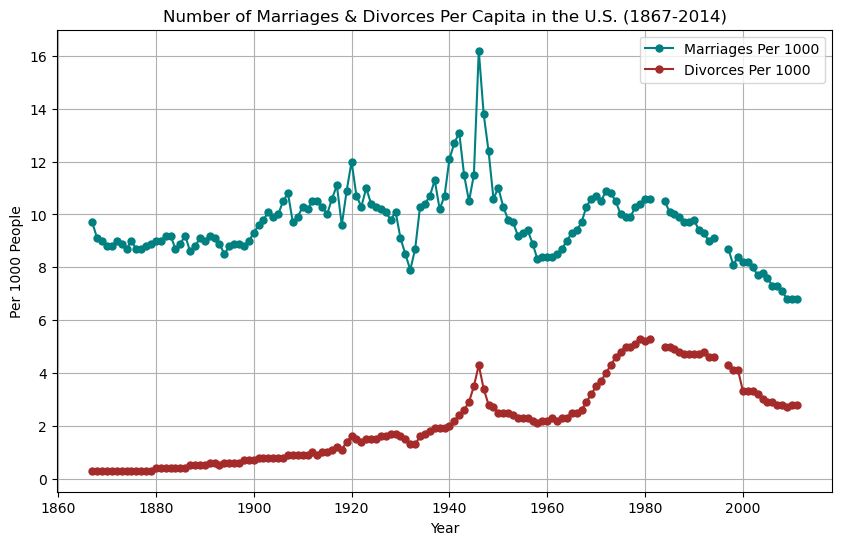

In [54]:
# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

print(df.head())

# Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages Per 1000', marker='o',color='teal',markersize=5)
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces Per 1000', marker='o',color='brown',markersize=5)

# Add labels and title
plt.title('Number of Marriages & Divorces Per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Question 7

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


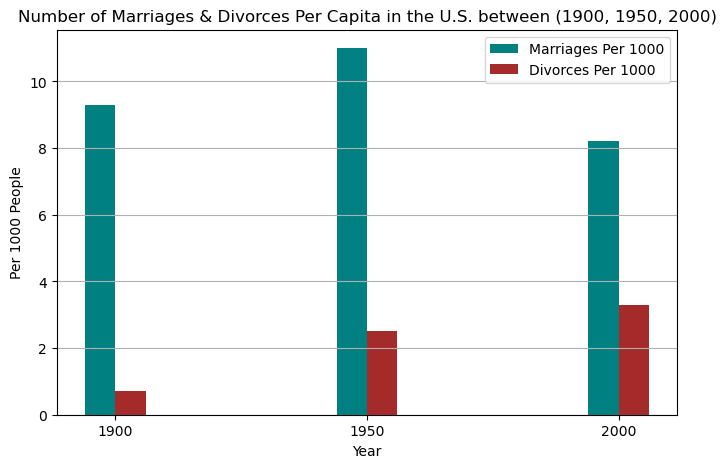

In [55]:
# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

print(df.head())

# Filter the data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
df_selected_years = df[df['Year'].isin(selected_years)]

# Create a vertical bar chart
plt.figure(figsize=(8, 5))

bar_width = 6
bar_positions_marriages = df_selected_years['Year'] - bar_width / 2
bar_positions_divorces = df_selected_years['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, df_selected_years['Marriages_per_1000'], width=bar_width, label='Marriages Per 1000', color='teal')
plt.bar(bar_positions_divorces, df_selected_years['Divorces_per_1000'], width=bar_width, label='Divorces Per 1000', color='brown')

# Add labels and title
plt.title('Number of Marriages & Divorces Per Capita in the U.S. between (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Show legend
plt.legend()

# Show the plot
plt.xticks(df_selected_years['Year'], df_selected_years['Year'])
plt.grid(axis='y')
plt.show()


## Question 8

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


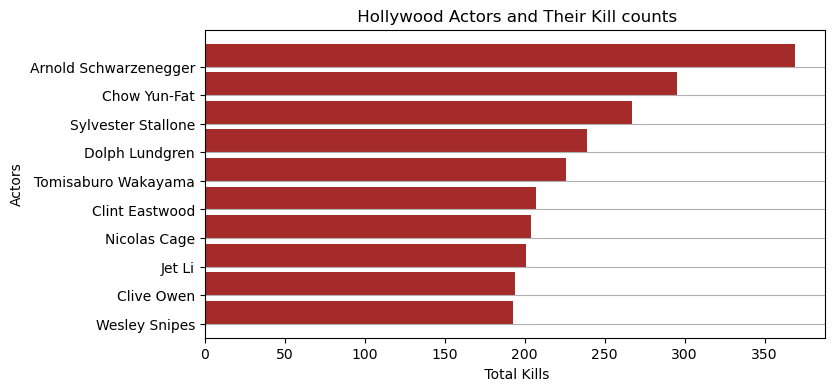

In [56]:
# Read the CSV file into a DataFrame
df = pd.read_csv('actor_kill_counts.csv')

print(df.head())

# Sort the DataFrame by the kill count
df = df.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 4))

plt.barh(df['Actor'], df['Count'], color='brown',align='edge')

# Add labels and title
plt.title(' Hollywood Actors and Their Kill counts')
plt.xlabel(' Total Kills')
plt.ylabel('Actors')

# Show the plot
plt.grid(axis='y')
plt.show()


## Question 9

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


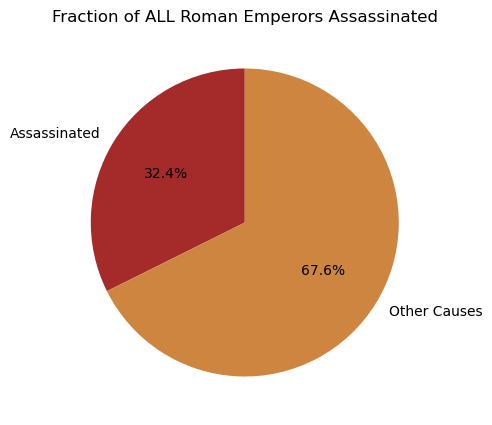

In [57]:
# Read the CSV file into a DataFrame
df = pd.read_csv('roman-emperor-reigns.csv')

print(df.head())

# Count the number of emperors who were assassinated
assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors who died from other causes
natural_causes_count = df[df['Cause_of_Death'] != 'Assassinated'].shape[0]

# Create a pie chart
plt.figure(figsize=(5, 5))

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, natural_causes_count]

# Colors for each category
colors = ['brown', 'peru']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Fraction of ALL Roman Emperors Assassinated')

# Show the plot
plt.show()


## Question 10

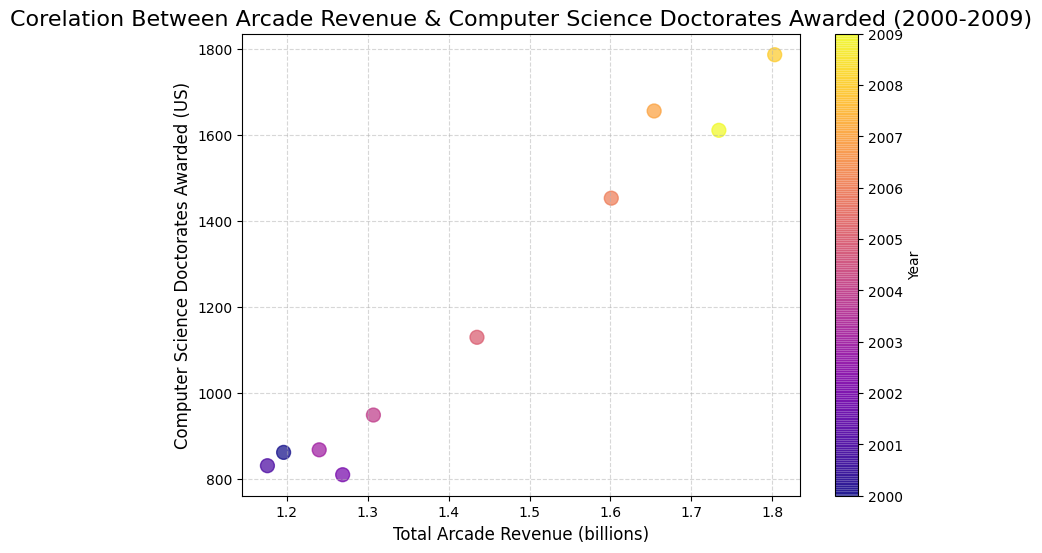

In [6]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create a scatter plot
plt.figure(figsize=(9, 6))

# Scatter plot with colored points
scatter = plt.scatter(
    df['Total Arcade Revenue (billions)'],
    df['Computer Science Doctorates Awarded (US)'],
    c=df['Year'],
    cmap='plasma',  # Changed colormap
    marker='o',  # Changed marker style to circles
    s=100,  # Marker size
    alpha=0.7  # Slightly increased transparency
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Add labels and title
plt.title('Corelation Between Arcade Revenue & Computer Science Doctorates Awarded (2000-2009)', fontsize=16)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.5)  # Added grid lines with transparency
plt.show()
